In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [7]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [8]:
#data exploration
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [9]:
import os
os.listdir('./data')

['wikispeedia_paths-and-graph']

In [10]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


## Longer paths more challenging -> lead to giving up?

54 paths given up on in common with finished


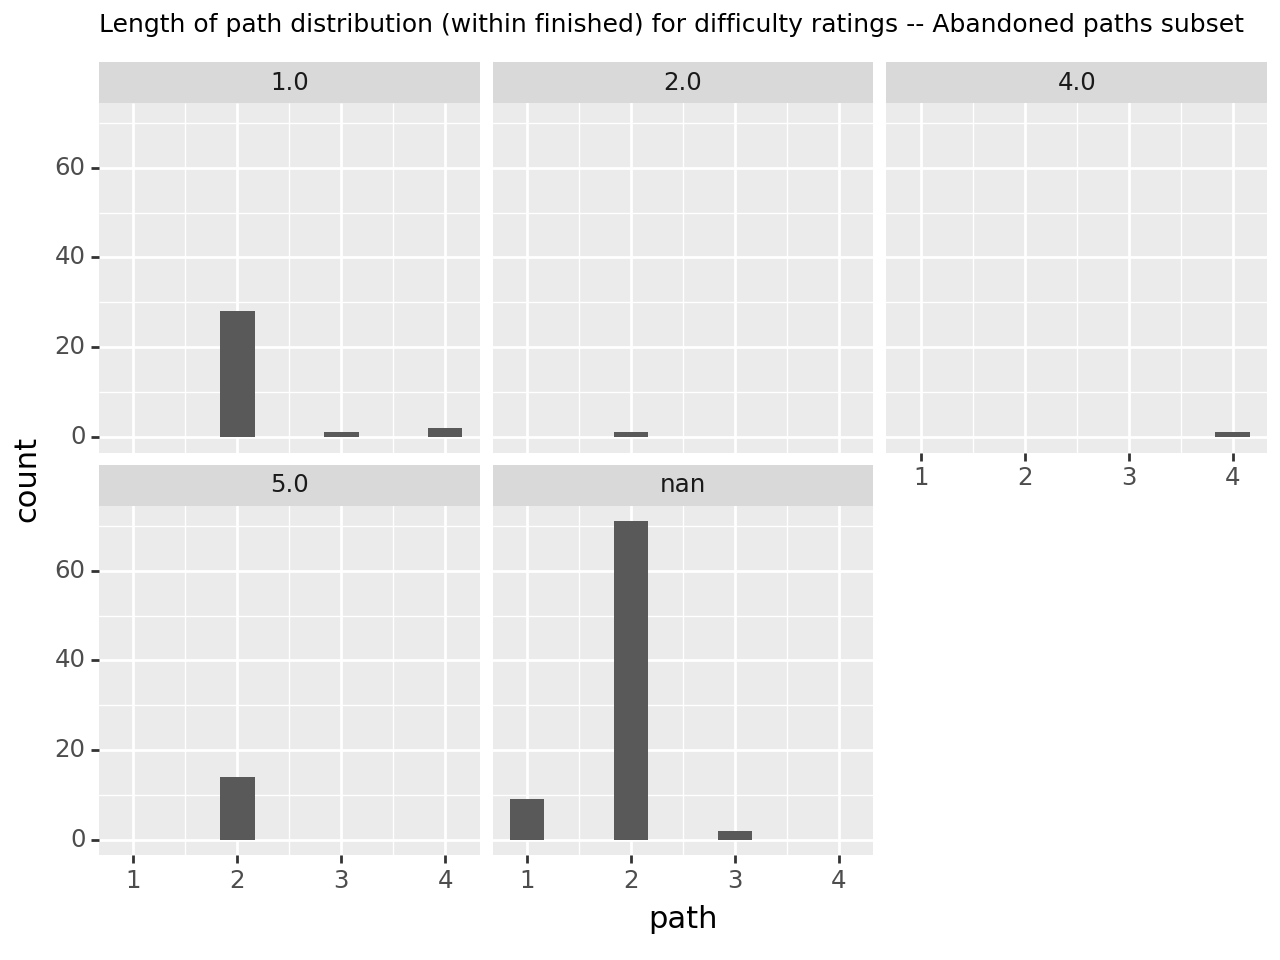

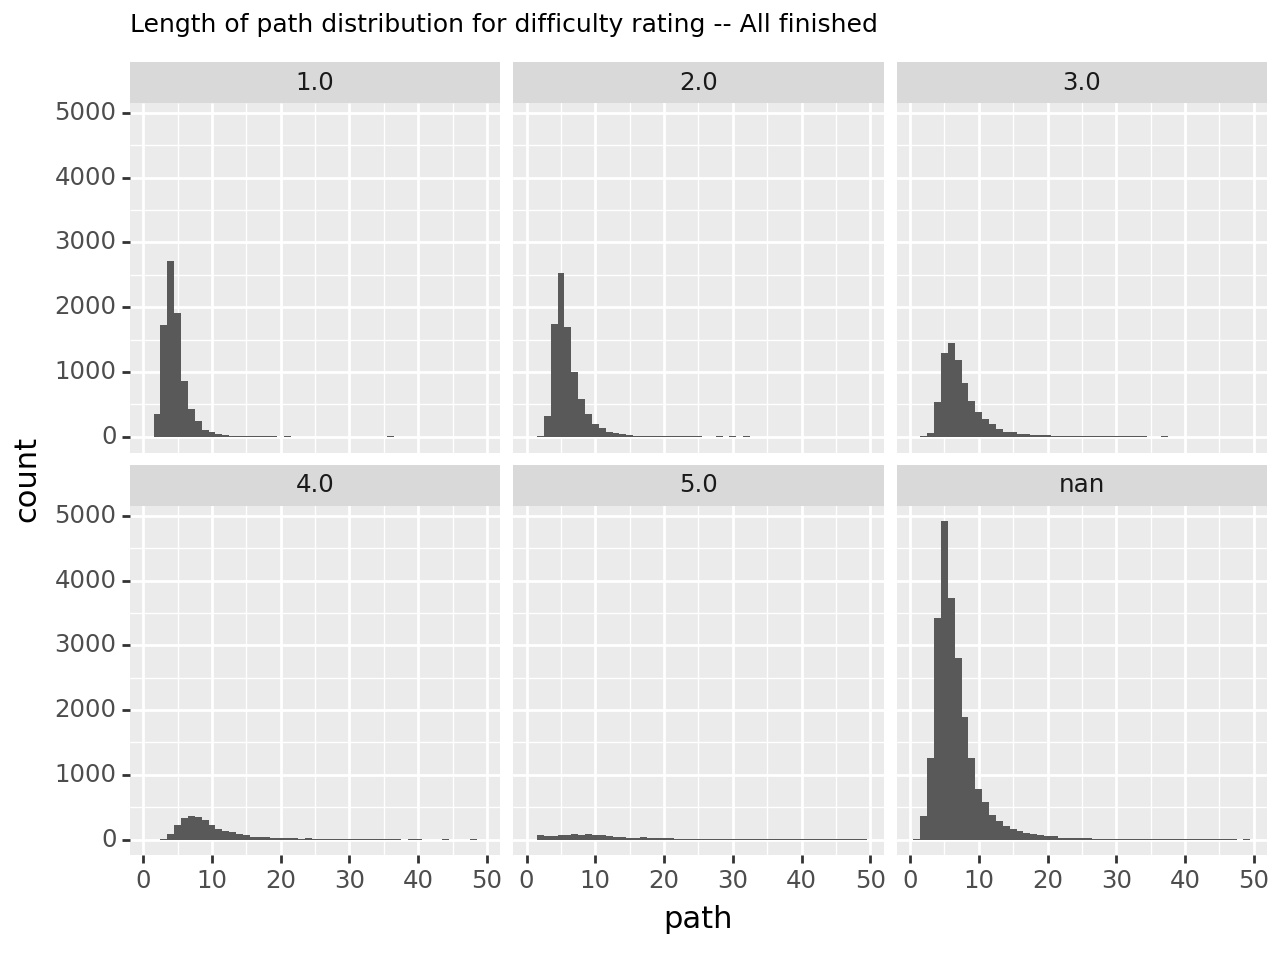

In [124]:
paths_finished_set = set(paths_finished['path']) # Get finished paths
given_up_paths = set(paths_unfinished['path']) # Get unfinished paths

# These are both sets of strings

common_paths = paths_finished_set.intersection(given_up_paths)
print(len(common_paths), 'paths given up on in common with finished')

common_path_idx = np.concatenate([np.where(paths_finished['path'] == x)[0] for x in common_paths])



paths_and_len_common = paths_finished.iloc[common_path_idx][['path', 'rating']].copy()
paths_and_len_common['path'] = paths_and_len_common['path'].apply(lambda x: len(x.split(';')))


p1 = ggplot(paths_and_len_common) \
	+ geom_histogram(aes(x='path'), bins=10) \
	+ facet_wrap('~ rating') \
	+ labs(title='Length of path distribution (within finished) for difficulty ratings -- Abandoned paths subset') \
	+ theme(plot_title = element_text(size=9))

print(p1)

paths_and_len_all = paths_finished[['path', 'rating']].copy()
paths_and_len_all['path'] = paths_and_len_all['path'].apply(lambda x: len(x.split(';')))

paths_and_len_all = paths_and_len_all.sort_values(by='path')
paths_and_len_all = paths_and_len_all[:-50]

p2 = ggplot(paths_and_len_all) \
	+ geom_histogram(aes(x = 'path'), binwidth=1) \
	+ facet_wrap('~ rating') \
	+ labs(title='Length of path distribution for difficulty rating -- All finished') \
	+ theme(plot_title=element_text(size=9))

print(p2)

Conclusion (for now): not enough data to determine whether or not certain characteristics are going to make people give up:
* only 54 points
* within the given up subset that has ratings, there's no obervable immediate difference between 1.0 and 5.0 difficulty score, which is a problem. The difference is a lot more observable between all finished paths. (see 1 vs 4 for ex.)